## Continuous Optimization #8 

Optimize the function *F6: Shifted Ackley’s Function*. You should provide results for dimension D = 500.

In [5]:
from __future__ import division
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [6]:
# shifted Ackley's data points and parameters
ackley = [
27.00775710883052500000	    ,	-16.13168918554272900000	,	6.41055501250719570000     	,	-0.84105187744201615000	,	23.47793796893409300000	,	15.72580998164368500000	,	-2.61194008989951950000	,	-28.88978140510653600000	,	19.28442985771519600000	,	-3.31779813880834950000	,	6.92594088600568370000	,	17.51622224562212400000	,	25.30877824468814900000	,	14.29243474863992000000	,	-19.42403133032291900000	,	-5.65762721627427110000	,	26.12818194645633000000	,	25.01426639480445900000	,	-5.38378758054327730000	,	23.61897185481201700000	,	-26.52652171294388600000	,	-8.82791206697997670000	,	18.78998983822546600000	,	-29.40832196034458700000	,	-21.66654708258300800000	,	-17.83408688638360900000	,	-18.07669544031062300000	,	6.22754875162915770000	,	-13.66872450180238000000	,	-18.07114393433627000000	,	-29.08356437825782200000	,	14.80714059386576100000	,	-3.29421406272319220000	,	25.90887470769988000000	,	-2.04033949947455890000	,	-4.88103193634962550000	,	20.77328506945946900000	,	1.50914977831034140000	,	-17.84115854097676400000	,	10.32824810845730900000	,	20.28710670314320200000	,	-28.82162916811094900000	,	10.87662967692811800000	,	-7.23113891832011650000	,	19.90776105657639100000	,	0.16877303977505420000	,	12.56828356220320600000	,	-4.26645807954019670000	,	-11.72295798783633800000	,	-18.62077514716950300000	,	-18.39413061568709700000	,	10.93339341548301000000	,	-11.83413595340346100000	,	2.50043123388525860000	,	-20.94762143101412000000	,	11.87390891159180500000	,	-7.29761996923973300000	,	21.60069629320917500000	,	21.21930783976606000000	,	5.61377475238089830000	,	-0.20685301781382748000	,	23.98615051017660000000	,	19.29774964412056400000	,	8.69462305163066420000	,	19.07846045035471100000	,	9.61365338649613930000	,	-9.48176290378705390000	,	-12.61644624862571000000	,	-9.52838583510699170000	,	2.04474105759602760000	,	13.62679301578061300000	,	-11.44259041254253600000	,	20.30976269628482800000	,	4.08434766046654830000	,	-7.77518660207300980000	,	12.16439479442261300000	,	2.79426910974637370000	,	-3.30718771962526860000	,	11.67403442553285200000	,	7.27860784772480680000	,	17.68926481205559000000	,	27.41060690669262100000	,	1.35542094484246790000	,	22.80853244467964200000	,	-19.62263152348580400000	,	28.78481380733045800000	,	-13.71316448149200800000	,	-14.86023918756058000000	,	22.54451398908446400000	,	14.23835930791534600000	,	-21.80887546441741900000	,	-29.29459875881292100000	,	23.63387798671519800000	,	-18.05171596765570300000	,	-12.07661927386713100000	,	9.68655458293950030000	,	-12.93548461500332500000	,	-1.84654288733993610000	,	-26.11313262220365100000	,	29.30009629665784100000	,
4.96750089367385070000      ,	-4.59022458893695530000   	,	0.93070512844576925000   	,	-9.96291120169448160000	,	-4.02560423359625470000	,	-16.44300791133321100000	,	4.78841239497594270000	,	15.62190058826064400000	,	1.78938700296396290000	,	8.43158993939011480000	,	-17.45583573369479800000	,	-7.21089777895253190000	,	16.99971899206276000000	,	10.85074508383377900000	,	-2.33429240059806630000	,	4.06972274573005420000	,	17.65263908235688500000	,	-26.44904439173573300000	,	6.17214514001954480000	,	-26.98387177518762300000	,	-5.07750837340663710000	,	-11.70007937979048800000	,	22.46203029525757700000	,	-29.09943007940302500000	,	16.07702340066848700000	,	28.25069635533740400000	,	29.40495555678376100000	,	17.33170153402515700000	,	-3.68048797374527940000	,	-0.10132179309117362000	,	-17.16220010423002400000	,	8.60953727312099910000	,	-10.79786535201018400000	,	27.60591602214063300000	,	13.59790599851388000000	,	-5.28280750988131230000	,	14.67394698636932300000	,	-13.92316495743754600000	,	-3.60454142607950700000	,	26.00280649137538100000	,	10.99993946030907900000	,	-17.24640813967580400000	,	20.35429442017171200000	,	7.72707600144442350000	,	-21.97363509159442100000	,	-17.57203622151870100000	,	6.43193667237182610000	,	7.79327093053848330000	,	-7.77139043688622170000	,	4.50886674284811310000	,	-2.91451039425139770000	,	-27.36628047917136200000	,	-28.36889262019952100000	,	-11.23889711519128200000	,	-29.22824551962015200000	,	-6.96196269034189540000	,	10.98695806827598900000	,	-24.42945229554481300000	,	-27.87970056185066500000	,	6.74372888238134750000	,	6.51242167343949770000	,	-29.05441092481496000000	,	-29.01870398700020800000	,	-18.59552465521645800000	,	5.21510831308040680000	,	-26.54513460730268500000	,	-7.94591767041934820000	,	7.88706988466658740000	,	13.05806528794184400000	,	11.56016368306726600000	,	-24.95525635497332200000	,	-2.73869101466685550000	,	-3.49030218561946270000	,	-8.80497269995856510000	,	-20.78361824859049300000	,	10.53867897800473200000	,	11.95279966447574800000	,	13.65054775307584100000	,	-1.29693714260056230000	,	3.29051918050061690000	,	-22.73717321781514000000	,	-2.95476354123680450000	,	12.95297689037846600000	,	23.57049648874519200000	,	-13.61385178649145500000	,	-14.71384226626300200000	,	21.93620866468511100000	,	-16.05897776234805000000	,	18.29230464694236200000	,	24.50385260691109600000	,	-16.08634091326049300000	,	-15.64124613186089300000	,	-27.01473095572501400000	,	-25.29695551379729700000	,	8.44892459220103120000	,	-18.54680577614638500000	,	20.63216993246150800000	,	-19.56598509229294400000	,	-19.75243117549921500000	,	29.65772943083518200000	,
-3.61254858321719750000	    ,	-9.59712306865857200000   	,	-11.14696136735827600000	,	-8.09529678427982090000	,	-6.40562692761254840000	,	5.49151222478674580000	,	-22.81520298289149200000	,	-27.71227219395772700000	,	-2.48412272010259730000	,	22.19204102442049700000	,	26.05419113505738700000	,	-14.13305003104355400000	,	-20.38197964816917100000	,	22.37131542117776200000	,	-15.72718153586603100000	,	8.74987499849932250000	,	28.01324525453586000000	,	9.89587271552064610000	,	22.22286155435863700000	,	-29.40436171419914800000	,	-21.77940649754278700000	,	19.12534959085665800000	,	-4.19003705718618490000	,	23.41930342616566200000	,	14.09449270595674600000	,	11.23941549624608200000	,	-9.23328193552954700000	,	-20.03791567336686800000	,	-20.66324542097677200000	,	-18.53302131480349100000	,	-4.65290844674765940000	,	21.35854243684485700000	,	-0.58500077903786263000	,	18.95608613801016400000	,	-2.35381011519096720000	,	-2.55873718515001160000	,	-2.95866710203674190000	,	-5.26685633879771940000	,	24.09658948591467700000	,	-29.66496364814771900000	,	-12.15565926244443800000	,	-27.05025065423485800000	,	11.59082719536509400000	,	9.00638459474826900000	,	28.97926692278560500000	,	3.16039460661750130000	,	-5.99558904956855440000	,	-18.07268881332983700000	,	7.51206137203931950000	,	14.00176811348607200000	,	-7.44687109901179060000	,	-29.40741222607285000000	,	-4.80853162138686230000	,	15.22017754881522900000	,	17.63230648393911800000	,	25.19743240175228700000	,	20.68329011449048200000	,	-7.93482705190293200000	,	7.24807990926863250000	,	13.87663586798068800000	,	-18.36640920091990700000	,	24.28874004998142100000	,	4.15234498030482510000	,	7.90739575330535870000	,	-15.93522267550476600000	,	2.92692753231528970000	,	25.89500115478144000000	,	-9.88815418761632260000	,	9.33186330072086890000	,	-6.48574758665979800000	,	7.63888728503980020000	,	11.94480826472025100000	,	-6.16896277244312690000	,	-5.18226627970918230000	,	9.31277678134023290000	,	20.25510592991142300000	,	-7.70351806544027800000	,	-4.48481049104092120000	,	5.67980228715407520000	,	3.94431432514286940000	,	12.99254383500296200000	,	0.67868689013385719000	,	16.58407271600950800000	,	-0.63927144609008835000	,	-18.84573292648661200000	,	12.03812430876703100000	,	28.96252811437568700000	,	18.39826495732455700000	,	12.21405930021580800000	,	-0.90217684052589675000	,	-23.12323072976159500000	,	9.89133402841235920000	,	-8.07756649865272540000	,	-21.59733260791613000000	,	4.00636801818637880000	,	19.38049885744001000000	,	10.43691792572159500000	,	29.96683829696407700000	,	27.69818442891421700000	,	-26.46827007266461300000	,
-8.38132974481319340000	    ,	2.91076882407607230000    	,	-14.29382580769240400000	,	5.84069087603062090000	,	-27.04332020423914400000	,	4.26344966307988220000	,	12.05143399423987200000	,	27.73729552302969400000	,	15.03109391665600500000	,	14.39958272270848000000	,	-4.08759686358162000000	,	8.05595737892853240000	,	18.18158041391581700000	,	-24.96713957993794300000	,	26.72776727462324700000	,	24.95654759364731500000	,	6.11924541828020810000	,	-14.78636527606012200000	,	22.40704833242360600000	,	0.80404259977660431000	,	13.95903894776356000000	,	-4.66640483283631720000	,	27.68219993137857700000	,	-25.67644568687946800000	,	3.20447808182313310000	,	-12.48096473145356800000	,	21.47781078504451800000	,	-9.85469167882742520000	,	10.81223102223040700000	,	-26.79333472089081900000	,	-8.60066776334422300000	,	-0.10172423786804785000	,	-3.93356770678236600000	,	3.74750502644084090000	,	6.99726780992781980000	,	-23.19960114608668500000	,	23.89510443678807400000	,	15.27308251431915000000	,	17.46739174264005400000	,	18.89712407599376600000	,	10.20023189362093800000	,	-17.94741526229025700000	,	-13.61471030718205500000	,	7.57407831903041280000	,	2.21110168905036630000	,	-26.42975694477001600000	,	-24.66229443148051100000	,	-13.72150953709800800000	,	-5.45566105373679730000	,	-1.55751297753123550000	,	24.53936094211891800000	,	5.77482828634344970000	,	-10.26268187015760700000	,	-1.30833445647924760000	,	5.83024675562067070000	,	-20.31307470600296500000	,	19.76845505243159100000	,	27.36734438129263200000	,	5.73287971212180030000	,	-28.27510720731061500000	,	18.72706913158081200000	,	6.60681456955560260000	,	12.08955605175463400000	,	-24.46822783681963600000	,	-4.50665152147879770000	,	-7.46540049265524170000	,	-20.03075514091208800000	,	19.98908756715819400000	,	20.31838227953807800000	,	-2.90315824523621660000	,	27.39608290439230100000	,	-21.17080581261702600000	,	22.19597579208401300000	,	16.16618400931059800000	,	-3.35030305776170320000	,	7.23720725957162610000	,	27.10135684785004200000	,	8.40057933279311440000	,	-15.16034225584030200000	,	-8.83788031481299540000	,	-18.72837117013423800000	,	-0.56133851306793403000	,	-5.44354025072957270000	,	-2.18846497341587920000	,	6.65661299234957230000	,	-25.72989204770669900000	,	-11.14318265148382300000	,	6.50301931186420750000	,	-19.49878908297794300000	,	7.26164601297560350000	,	-15.24240397399386600000	,	5.24149290935353210000	,	0.36320722951614215000	,	-2.11326457092820160000	,	2.48513581737185520000	,	26.53959416975651200000	,	-9.49445459577535190000	,	-5.89173944561857970000	,	-11.53872387248812700000	,	-5.30592244004334650000	,
-12.84364605616808700000	,	-6.35234332884988010000  	,	0.18086913073074484000   	,	13.31879078045827900000	,	-11.62748727258087900000	,	-23.27017728653010000000	,	-3.40260240332225910000	,	-1.99424686977897280000	,	-29.11986748323902300000	,	9.84311196147726970000	,	13.44370252259177800000	,	-13.10198381925269500000	,	-14.29087931365712900000	,	12.50828429192645100000	,	17.03154136829311900000	,	29.16946839371887300000	,	-1.59943767593206230000	,	24.16913005614754400000	,	-2.93647432768374020000	,	18.27100851837623500000	,	19.73186857565537600000	,	-20.02379299815758900000	,	-6.36563968082126050000	,	1.24544906244432600000	,	13.08743833682201800000	,	4.15137112604558920000	,	-2.35162960044083390000	,	-3.28157679559063100000	,	-24.73532363256060100000	,	-3.39100708599437080000	,	-8.02200924032058540000	,	-11.84797088857515100000	,	21.11068183994065400000	,	15.56876327279754700000	,	26.98555707774728800000	,	3.47631054279903400000	,	-29.14601904460201400000	,	5.77062506949695120000	,	18.97234254971780800000	,	28.62554129049073000000	,	-16.68551522756829500000	,	12.22102004434522400000	,	1.32365491815441420000	,	25.97382339910286900000	,	12.80126661071100400000	,	-16.31766582432608100000	,	-3.02147371984202810000	,	-19.66801827101933500000	,	28.12920859414500500000	,	-8.65703373257776220000	,	-27.05719031221947200000	,	15.32031430750448900000	,	23.68876580860231200000	,	-12.83102097270744200000	,	-14.92796722303923200000	,	25.96417148146137800000	,	-22.14105185258117500000	,	26.44917253762898900000	,	12.11119041422871600000	,	20.86058809076773500000	,	-17.44370156025333100000	,	-2.69449855363787090000	,	-25.13557648542820300000	,	21.06734405543131300000	,	3.72292059143333630000	,	-10.84222221628598600000	,	-7.50604431314399180000	,	22.06774187469731900000	,	-7.66942559284824200000	,	-25.57859665951152900000	,	-18.00972025751158200000	,	-27.03040322017884400000	,	4.00258674742254070000	,	-22.68451500927433500000	,	1.32670581372938300000	,	-22.97639086002018900000	,	16.19510865501987200000	,	-7.49665220041835670000	,	19.40323221901601200000	,	-27.20183126861039800000	,	5.87479569630735910000	,	26.94902366942622500000	,	-12.67214083386808800000	,	23.32995661798679500000	,	-23.90487131323487100000	,	-26.08112959857094300000	,	-15.94201600157095000000	,	25.98590510690598200000	,	-26.21232624287071300000	,	-14.14694017637095100000	,	29.97190045597487500000	,	-17.28072224908081700000	,	-0.09541208619438279500	,	-12.57070228632272800000	,	10.36526465550079500000	,	27.47946719431177300000	,	15.99309206612962000000	,	9.96742426432210490000	,	-22.14331067405969100000	,	-24.27521901140804800000	,
-29.10813975218888300000	,	-12.70839926465502900000	,	19.00387280620233800000   	,	29.12901059106992100000	,	-28.95823841773571100000	,	19.16357594053004500000	,	7.26832234729308620000	,	3.61332245777563090000	,	-15.35810795984854900000	,	19.32045530922368900000	,	-14.20728432256265400000	,	15.21807206314034700000	,	9.57868792841613730000	,	-17.15622864894518800000	,	6.12701449750405660000	,	6.29622660317775740000	,	9.57009288991436340000	,	-18.99818204973597700000	,	8.19281431969355370000	,	-19.78145339216347800000	,	2.37606635237899160000	,	7.40365095265478600000	,	11.15339839444557400000	,	10.64075716228476400000	,	22.60980145161604300000	,	-29.22656998654012000000	,	-11.37586643595496500000	,	16.74475484920625900000	,	-11.56223490469891500000	,	25.60069863829875900000	,	10.72319255126581800000	,	-25.54071042692952500000	,	-25.75984851894768100000	,	-29.28417199888739500000	,	-16.37077709691940100000	,	0.97511981518093549000	,	-2.50774708023611130000	,	12.19220029523902600000	,	4.94903250097170400000	,	0.55236010887360010000	,	-25.54262345435510500000	,	-18.40582118256415400000	,	-7.22375199992225350000	,	-13.41391676986213700000	,	16.25291017401261900000	,	-11.16420059981586700000	,	8.29159314652486050000	,	29.19401184605467800000	,	0.17254821504269557000	,	26.86220260812842000000	,	19.68155050835525800000	,	25.05343219314342200000	,	-23.21521025244334500000	,	18.72755436354284300000	,	24.49575378640473400000	,	-20.61743283645463300000	,	-22.67287399959923300000	,	15.75998818576597700000	,	13.30801707100550100000	,	9.09838899532380200000	,	15.24135995122900800000	,	9.78972047082636010000	,	23.00961011356643100000	,	-13.67055381695236700000	,	-4.83403706627135680000	,	-17.22038046645065600000	,	-27.86400197688243800000	,	-25.13017775455291100000	,	21.03400699472313600000	,	-9.58779316243636260000	,	-2.03070130679284230000	,	24.82579438421864600000	,	-16.28539764887185700000	,	21.72269400899045900000	,	9.39711214055287770000	,	23.47096814675413900000	,	-0.71138890560279577000	,	29.55873880083050400000	,	-7.60044356733992290000	,	1.88269907046316830000	,	-19.12102026775827600000	,	0.11666011114821018000	,	-4.66831035600012710000	,	9.62564397142621430000	,	10.41918066868434100000	,	27.43981097419591500000	,	-18.48805525767061700000	,	-23.32701370637239800000	,	3.90323225128353360000	,	28.14997634655166800000	,	-28.57536774724196600000	,	22.21294932265307400000	,	-28.38740443342829100000	,	1.17172130249197440000	,	-18.46251475932710000000	,	12.94134280545134900000	,	-14.95963312270939700000	,	26.03188894802175900000	,	-21.76864124779112000000	,	1.29734035178923080000	,
23.71210142610335200000	    ,	26.54323526282901500000   	,	-9.89499727711772080000  	,	-3.75817057914553840000	,	-1.73064544760509880000	,	-21.04137986925458400000	,	-21.84813634906593900000	,	1.94989380858671520000	,	13.54735856579912900000	,	-6.07781692113567120000	,	-8.49488903897481860000	,	-12.88323526982959800000	,	22.11811464209830500000	,	7.58476047825657670000	,	-15.52966148893495700000	,	28.68489917885976600000	,	8.43004680263117480000	,	-16.20908115463551300000	,	10.88010929779990500000	,	9.94940451007143880000	,	-21.91692157093310900000	,	-28.65040239515873200000	,	-14.26803303830333300000	,	-23.00909042312218800000	,	-25.84090572607465900000	,	21.17582985783906200000	,	-19.18015964572619600000	,	-28.05488613518976800000	,	14.03557541709994200000	,	2.19100936430061920000	,	-13.43822019482573200000	,	-7.89251080788642060000	,	-29.22682166518415400000	,	23.35236506740660900000	,	21.96123611837753500000	,	-14.74518392257961700000	,	4.16883580200378390000	,	-20.44411091602815100000	,	5.66186497240356350000	,	-10.13399513162547900000	,	9.51675923927677300000	,	21.81805308742437400000	,	4.05739883198116760000	,	28.82887647275053000000	,	17.50989614015362900000	,	-20.84438267750380200000	,	19.98163397588074000000	,	-18.48820413279385400000	,	8.33919407266522230000	,	10.14000475860856900000	,	16.32526799658663200000	,	-7.21093502209886590000	,	-3.50487087905534620000	,	-1.01640038442884160000	,	6.48633938679949300000	,	-19.44026151980758500000	,	-29.87846634094497100000	,	17.41344013066551400000	,	0.81651009966838117000	,	-17.20623740950804900000	,	-23.79301224213942600000	,	-20.55980004612519700000	,	-5.54910119464496180000	,	-5.53457868260019480000	,	-26.83843873872167400000	,	26.50890899142653000000	,	-21.00169895092966500000	,	-6.93755723022051280000	,	-11.33648645415775400000	,	-19.88793341516763000000	,	23.79888876926435200000	,	-10.63653410967778600000	,	14.03977900896730100000	,	-5.34574905454232410000	,	-6.01236926080718700000	,	0.33133243830798520000	,	-19.84164845434322200000	,	1.48472941453058030000	,	8.47215980001691090000	,	-29.02815096153569700000	,	20.21109334898874000000	,	18.20773126563900500000	,	11.86708981247254300000	,	-2.28673310473818960000	,	-25.04324292621070600000	,	19.24302052329333200000	,	-18.41879892842639400000	,	-3.27871630932187230000	,	-29.22253022720962800000	,	-11.47549220263606500000	,	22.52105898420193600000	,	20.11556392149446300000	,	-10.01429595474964200000	,	22.84231991039435200000	,	-1.21879165869486880000	,	3.64900366652554450000	,	6.95451933016391880000	,	9.71394089561185580000	,	6.99799409876550270000	,	11.10840001355190800000	,
0.60918162257872410000	    ,	12.83765067209552800000    	,	0.91247396838372197000   	,	6.35194764962417930000	,	28.00215777922786500000	,	19.32704410580352300000	,	-10.93495923360458000000	,	5.26180631976239250000	,	-22.18789971064646900000	,	-14.73874457879866600000	,	18.18185389557069000000	,	10.07075362431079700000	,	-29.18241883322932000000	,	3.69476218297867120000	,	-2.72634371717471780000	,	24.29695320233622600000	,	-13.07046893286855000000	,	-26.09793876702844500000	,	-1.40448687964620690000	,	29.02271509171572500000	,	25.34097487100840600000	,	3.67177528880139190000	,	9.13948162150361300000	,	16.36077583197698000000	,	-23.62945238965401600000	,	-29.93559806597332700000	,	2.50582737267050960000	,	-29.58853249554039900000	,	-2.91973967373967720000	,	-18.26027689835248700000	,	17.22858773321563300000	,	7.11375745163754660000	,	-29.06874256588131200000	,	23.45123789542563500000	,	15.70219147930122000000	,	24.42210245404470500000	,	15.51411594137283600000	,	-7.15620373935622210000	,	-10.13335284609396700000	,	0.24470661991208331000	,	3.87411564095993550000	,	16.03184141832978300000	,	16.79206676727773800000	,	-0.95412690919745913000	,	18.13279349298999700000	,	-1.73927078186519070000	,	-17.83446626066603400000	,	4.77689356748451390000	,	9.99001556955169430000	,	10.60591729494022700000	,	26.55067459951759200000	,	16.20891200838639900000	,	14.24425892751772000000	,	21.97573643372610500000	,	29.45689921878868500000	,	0.23565591666552876000	,	7.74513305889121990000	,	17.55661923982697200000	,	-3.08104769448674530000	,	1.46142645412122720000	,	-19.71160671588323500000	,	-22.16005490237235200000	,	-16.87313255896955900000	,	-23.67116983984665500000	,	-21.51444886492812700000	,	-2.58190193182772630000	,	17.28798272742890400000	,	-13.13616143446724000000	,	-16.51279616017491800000	,	24.53248396828875100000	,	-29.56026929072782400000	,	5.32436007060044860000	,	2.52707221804044480000	,	9.21143886016527350000	,	-11.19390141434720600000	,	-16.13047050550564900000	,	-5.03617013221651530000	,	-12.07207272914023800000	,	10.34618344636228200000	,	26.29544879449292700000	,	-9.41113837633006870000	,	3.77775432245161370000	,	-22.86668653895727500000	,	-19.85872435115849300000	,	-13.26627495069848100000	,	3.40887945914001730000	,	-0.86465034602344204000	,	27.13339359055549900000	,	-16.08474942307135800000	,	-1.28049640382837990000	,	1.59134404083797780000	,	17.56324761933147700000	,	-18.41954088128284900000	,	24.57602674414029300000	,	25.33178356304296800000	,	-29.20401806868280300000	,	16.05297801190779000000	,	26.84055830513585800000	,	18.79833148226575200000	,	25.42978763076334300000	,
-18.06016448623841300000	,	10.45629852639047600000  	,	25.62618516294356400000  	,	-9.37100443764983740000	,	5.66957627329458090000	,	6.92922019801383020000	,	-29.79755550647435000000	,	28.92075409779501200000	,	23.97078551062067200000	,	11.56544085794470800000	,	-3.62077940584216410000	,	12.06137478683673000000	,	6.58289933480591570000	,	-12.00686031212074000000	,	21.36223162324698400000	,	-23.27566978826051900000	,	-12.50637535470706000000	,	-24.15319634900221500000	,	-6.15312181986735850000	,	-10.00124085565372700000	,	26.65408283391697400000	,	20.31332718114818900000	,	-14.49435582186840500000	,	-27.42611248822936100000	,	-29.64691261416064800000	,	4.46507804441454680000	,	14.63411713712194000000	,	18.40984702945797100000	,	8.25423865601412390000	,	-14.92372118794824600000	,	-21.34077291212999600000	,	9.09306795040083670000	,	26.76521585620066900000	,	18.95320776130394300000	,	25.81482392403069800000	,	-11.40351843309071400000	,	-13.87097333647143000000	,	2.18706210164473450000	,	-20.20330224767263900000	,	-17.34071867199680400000	,	-16.99127458193396100000	,	9.10738976653259870000	,	-26.83342883591749500000	,	-16.24258318219607100000	,	10.04592771275205400000	,	-11.34397938340457700000	,	-11.60202827119966400000	,	13.24079304687830900000	,	27.26439060139148300000	,	-22.13169642019102300000	,	-25.90339145550655800000	,	-22.48636388056847600000	,	-20.03079509355164900000	,	24.68504788165829900000	,	-21.82438394663691700000	,	7.01972525450473480000	,	-13.86110122216878400000	,	-16.76015804252536200000	,	12.77406132421730000000	,	2.93978653657450200000	,	26.48090544021536600000	,	-10.20811332260539200000	,	12.26917811234540100000	,	26.60552763349858900000	,	4.89566024663334080000	,	22.80925109078351900000	,	14.97669867432485800000	,	-7.22295946375851020000	,	13.53367675786943600000	,	-20.23210780022303000000	,	27.37227675341344500000	,	-18.22627016883666000000	,	16.57155035014288600000	,	6.79774294259825500000	,	-20.26318613679760700000	,	-28.13675679380389700000	,	-12.68227108465896800000	,	28.26385674832376100000	,	27.02996051462987700000	,	-16.31713153483358500000	,	27.51156508459973800000	,	10.79149556437641900000	,	-26.70184749545590100000	,	5.99047905081548750000	,	-6.41124040018697630000	,	-17.07802888111264700000	,	-19.05602252084726400000	,	-25.39475854732181400000	,	-29.55457823856691500000	,	17.32697977664528100000	,	-28.93274219260706200000	,	22.67648792666083300000	,	-8.84749389640971270000	,	13.32838607229894700000	,	28.10705036344739900000	,	-20.65992098556938200000	,	-20.22266748208906900000	,	-11.19615789983261300000	,	-28.23710710522557200000	,	-8.54249298305026270000	,
-28.36857610308035800000	,	17.62002111905874100000  	,	29.95384526751336600000  	,	-23.38568852715932400000	,	7.35606952173659320000	,	-22.04568928609843700000	,	-11.39821266297126800000	,	-21.91273873026477000000	,	-16.60042124080720800000	,	-6.20719270167468550000	,	-21.89139030768033900000	,	-15.53647863518424700000	,	25.65096898894295000000	,	-6.53394756059068980000	,	0.67576640803852683000	,	-24.42623303030201500000	,	-28.69806514212356400000	,	-20.42791039955375300000	,	20.67095662993295200000	,	22.74920894555909000000	,	-18.78062844827985600000	,	29.47829514207341400000	,	12.72179047000091900000	,	22.28187699564494300000	,	-1.22212891422741170000	,	-0.23970440658448666000	,	-12.74808814751363800000	,	-26.34351294319590400000	,	-14.25193774747416800000	,	-18.82433897716527900000	,	25.02538720939950400000	,	-22.60327834089736500000	,	-29.19327701396955600000	,	-7.81855688814524540000	,	11.91846649937497900000	,	23.36083279395027300000	,	5.62623114814542190000	,	-20.59854619611805400000	,	-10.99863487868225300000	,	-15.99627085033338000000	,	-29.49467617523521300000	,	-6.18577248785419090000	,	8.99208783555012300000	,	-24.89996362712243200000	,	16.12857019552554000000	,	28.18210229830198400000	,	12.88783391257230400000	,	16.91771051762982800000	,	-15.74609507758692200000	,	-18.25615417300346600000	,	-14.20716508946313000000	,	12.82710387576833000000	,	28.65598436613883100000	,	8.22731645075408120000	,	2.75544930594131190000	,	20.88343346501594800000	,	18.12585950880657700000	,	10.09838460400307300000	,	10.25895803819086900000	,	19.23862093714435400000	,	28.22834247654637400000	,	-0.78450026748593871000	,	19.04811213281719500000	,	8.49427007076002380000	,	-11.61903842916601400000	,	9.65592793436790230000	,	-8.51897319673148350000	,	26.29196580607281000000	,	-0.73998151410802038000	,	-24.54057853536201300000	,	10.43004701172441200000	,	0.89281913926970802000	,	-16.70523921686348200000	,	13.50056225713327500000	,	-25.90520334179440100000	,	27.84745610235226100000	,	-17.54060469788031900000	,	-20.33290646691740000000	,	8.29328295556488370000	,	-29.98630962650291900000	,	-9.86202339886978410000	,	-13.49401071202734000000	,	-27.32834877647818700000	,	-24.36621014415965200000	,	-5.40015601367835170000	,	19.01353916963725500000	,	22.23102430855917100000	,	-28.64669277263826400000	,	13.63061902187590800000	,	20.88056688383737500000	,	13.71601146108142200000	,	27.30591799650809300000	,	9.38106663581146450000	,	14.53830801054343200000	,	-9.30203916582475540000	,	23.04131698050908700000	,	-9.16535481004721220000	,	-26.43139916744864600000	,	13.10487546476520700000	,	27.49285757444440700000
]

dimension = 500 
x_min = -32
x_max =  32
f_bias = -140

In [7]:
# shifted Ackley function 
def ackley_function(x_values, data=ackley, dim=dimension, bias=f_bias):    
    Sum1 = 0
    Sum2 = 0
    for i in range(dim - 1):
        z = x_values[i] - data[i]
        Sum1 += z ** 2
        Sum2 += math.cos(2 * math.pi * z)
    Sum = -20 * math.exp(-0.2 * math.sqrt(Sum1 / dim)) - math.exp(Sum2 / dim) + 20 + math.e
    result = Sum + f_bias
    return result

In [8]:
# Particle Swarm Optimization 

class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity 
    def update_velocity(self,pos_best_g):
        w=1.0       # constant inertia weight (how much to weigh the previous velocity) 0.4-1.4
        c1=1        # cognative constant 1.5-2
        c2=2.5        # social constant 2-2.5

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
def PSO(costFunc,x0,bounds,num_particles,maxiter):
    global num_dimensions

    num_dimensions=len(x0)
    err_best_g=-1                   # best error for group
    pos_best_g=[]                   # best position for group
    err_log = np.empty((0,1))                      # best position for group    

    # establish the swarm
    swarm=[]
    for i in range(0,num_particles):
        swarm.append(Particle(x0))

    # begin optimization loop
    i=0
    while i < maxiter:
        #print i,err_best_g
        # cycle through particles in swarm and evaluate fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunc)

            # determine if current particle is the best (globally)
            if swarm[j].err_i < err_best_g or err_best_g == -1:
                pos_best_g=list(swarm[j].position_i)
                err_best_g=float(swarm[j].err_i)

        # cycle through swarm and update velocities and position
        for j in range(0,num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)     
        err_log = np.vstack((err_log, err_best_g)) 
        i+=1
    
    return pos_best_g, err_best_g, err_log 

In [9]:
start = timer()
initial = np.random.uniform(x_min, x_max, dimension)             # random starting point
bounds = [(x_min, x_max) for x in range(dimension)]             # function bounds
solution = PSO(ackley_function,initial,bounds,num_particles=15,maxiter=30)
end = timer()
elapsed_time = end - start

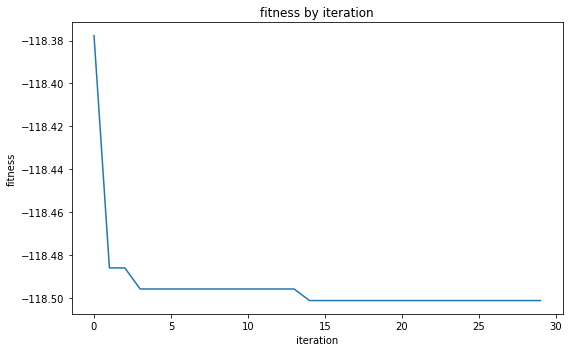

In [10]:
## create plot

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)

_ = plt.plot(solution[2])
_ = plt.title('fitness by iteration')
_ = plt.xlabel('iteration')
_ = plt.ylabel('fitness')

plt.tight_layout()
plt.show()

In [11]:
## results 

print('RESULTS')
print('Best solution: ', solution[0])
print('Fitness of the best solution: ', solution[1])
print('Computation time (seconds): ', elapsed_time)

RESULTS
Best solution:  [27.55495620149517, 26.864353850568303, -3.2488733758513675, 16.790910202787984, -31.606097281908465, 22.730846871060965, -20.519676720980716, -13.85404310142506, 10.287557165271862, 9.08482644085481, -15.901915080096845, 2.6083990203869143, 15.182870094796275, 12.037521328571005, 15.34075859739671, -10.52583664315365, 32, 4.757486502577612, -32, -15.352879054126465, 11.12298408006225, 13.204692385531363, 27.74655749191088, 6.500488307868199, -5.247297553431194, -15.467589104809376, 9.70778919976162, 23.521487540470574, -22.457480950692347, 26.01551356278567, -11.123265289352961, -4.021945013224135, -20.385471330481096, 1.1561856964775306, 32, 12.511125336928657, -14.9304754331206, -11.891434217421898, 11.729265116687799, 30.33529855384691, 18.49193775592869, 31.35320669762891, 9.625101080463773, -18.438421493928814, -32, 13.183368751315621, -15.469092074795736, -3.165711907160164, 7.617547011997507, -11.446760187874458, 13.102832221556815, 26.910500323442406, 3

Please see Conclusion and Notes in dimension 50 version